In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
#!pip install spacy

In [4]:
# importing libraries for NLP
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
import re

# Loading Data

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data = pd.read_csv("/content/drive/Othercomputers/My Laptop/Enhance IT docs/NLP/demo/train_val_df.csv", index_col=0)

### Making a Copy of the Data

In [9]:
df= data.copy()

In [10]:
df.head()

,clean,complete,comp_stem,comp_lem,summary,sum_stem,sum_lem,labels
0,Juul Labs Inc. will pay $40 million to North C...,juul labs pay million north carolina take act...,juul lab pay million north carolina take acti...,juul lab pay million north carolina take ac...,juul labs pay million north carolina take act...,juul lab pay million north carolina take acti...,juul lab pay million north carolina take ac...,Economy
1,Camila Domonoske An Uber sticker is seen on a ...,camila domonoske uber sticker seen car start ...,camila domonosk uber sticker seen car start p...,camila domonoske uber sticker see car start...,camila domonoske uber sticker seen car start ...,camila domonosk uber sticker seen car start p...,camila domonoske uber sticker see car start...,Economy
2,Jim Zarroli Amazon founder Jeff Bezos is the w...,jim zarroli amazon founder jeff bezos world w...,jim zarroli amazon founder jeff bezo world we...,jim zarroli amazon founder jeff bezos world...,jim zarroli amazon founder jeff bezos world w...,jim zarroli amazon founder jeff bezo world we...,jim zarroli amazon founder jeff bezos world...,Economy
3,Rachel Martin talks with economist William Spr...,rachel martin talks economist william spriggs...,rachel martin talk economist william sprigg r...,rachel martin talks economist william sprig...,rachel martin talks economist william spriggs...,rachel martin talk economist william sprigg r...,rachel martin talks economist william sprig...,Economy
4,"Bill Chappell ""We are ready for stores to open...",bill chappell ready stores open businesses op...,bill chappel readi store open busi open new y...,bill chappell ready store open business ope...,bill chappell ready stores open businesses op...,bill chappel readi store open busi open new y...,bill chappell ready store open business ope...,Economy


### Checking the length of the Dataframe

In [ ]:
len(df)

1037

In [ ]:
df.labels.value_counts()

tech             219
education        193
health           165
business         150
entertainment    114
politics         102
climate           75
sports            19
Name: labels, dtype: int64

## Finding the Missing Number

In [ ]:
df.isnull().sum()

summary       0
alpha_only    0
labels        0
dtype: int64

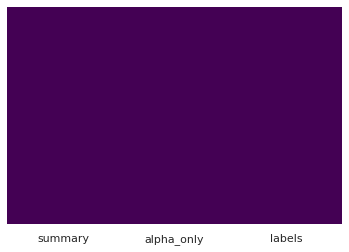

In [ ]:
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False);

### Dropping missing values

In [ ]:
df.dropna(inplace=True)

df.isnull().sum()

In [ ]:
df.head(3)

,summary,alpha_only,labels
0,john burnett hurricane ida came ashore sunday ...,john burnett hurricane ida came ashore sunday ...,business
1,number electric flying car companies setting s...,ann thompson jetsons number electric flying ca...,business
2,david schaper eu taking covid19 safe list airl...,david schaper eu taking safe list airlines cut...,business


### Checking for blank spaces in Both `summary` and `alpha_only`

In [ ]:
blank_in_summary = []
blank_in_alpha_only = []

for index, clean, summary, alpha_only, labels in df.itertuples():
    if summary.isspace():
        bank_in_summary.append(index)
    else:
        if alpha_only.isspace():
            blank_in_alpha_only.append(index)
            


ValueError: ignored

### Checking the `Labels`

In [ ]:
df['labels'].value_counts()

tech             219
education        193
health           165
business         150
entertainment    114
politics         102
climate           75
sports            19
Name: labels, dtype: int64

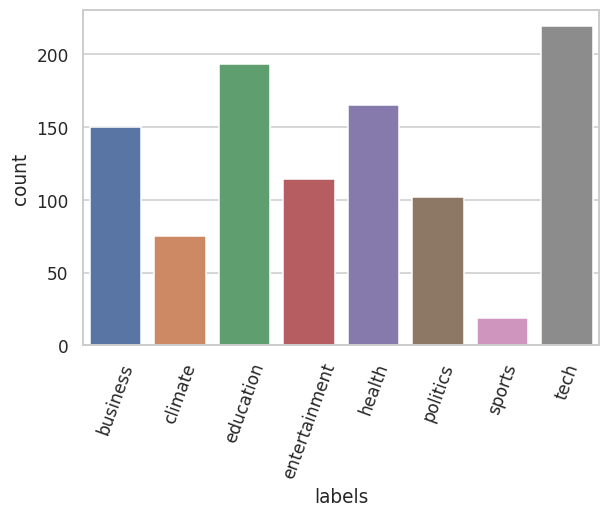

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(dpi = 111)
sns.countplot(x='labels', data= df)
plt.xticks(rotation=70);

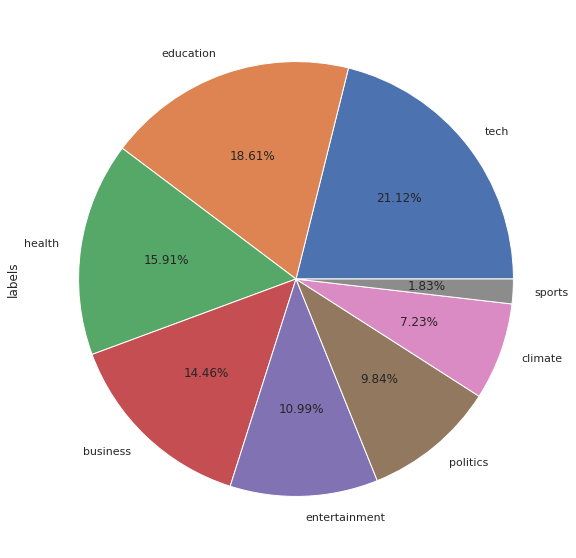

In [ ]:
df['labels'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(16,10));

# Exploring the `alpha_only` column

In [ ]:
df.head(6)

,Unnamed: 0,summary,alpha_only,labels
0,0,john burnett hurricane ida came ashore sunday ...,john burnett hurricane ida came ashore sunday ...,business
1,1,number electric flying car companies setting s...,ann thompson jetsons number electric flying ca...,business
2,2,david schaper eu taking covid19 safe list airl...,david schaper eu taking safe list airlines cut...,business
3,3,steve inskeep talks mohammad exinterpreter mil...,steve inskeep talks mohammad military company ...,business
4,4,ari shapiro mallory yu gus contreras postal se...,ari shapiro mallory yu gus contreras postal se...,business
5,5,rachel martin martínez supreme court allows te...,rachel martin martínez supreme court allows te...,business


# LEM AND STEM

In [58]:
!pip install contractions



     |████████████████████████████████| 321 kB 28.5 MB/s 
     |████████████████████████████████| 284 kB 51.6 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85457 sha256=0881c6ad5f93f6236ac43094ee66be97d4b7793f83a5f624c9e9c54f2ac008fd
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [59]:
import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk      
                                       # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')
import contractions            # contractions 
import re, string, unicodedata                          # Import Regex, string and unicodedata.
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [60]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))     

In [61]:
def replace_contractions(words):
    """Replace contractions in string of text"""
    return contractions.fix(words)

In [62]:
# Perform the above operation over all the rows of tweet column of the dataframe.
for i, row in df.iterrows():
    content = df.at[i, 'alpha_only']
    clean_content = replace_contractions(content)
    df.at[i,'alpha_only'] = clean_content

KeyError: ignored

In [ ]:
df.head()


,summary,alpha_only,labels
0,john burnett hurricane ida came ashore sunday ...,john burnett hurricane ida came ashore sunday ...,business
1,number electric flying car companies setting s...,ann thompson jetsons number electric flying ca...,business
2,david schaper eu taking covid19 safe list airl...,david schaper eu taking safe list airlines cut...,business
3,steve inskeep talks mohammad exinterpreter mil...,steve inskeep talks mohammad military company ...,business
4,ari shapiro mallory yu gus contreras postal se...,ari shapiro mallory yu gus contreras postal se...,business


In [ ]:
df['tok'] = df.apply(lambda row: nltk.word_tokenize(row['alpha_only']), axis=1) # Tokenization of data
df.head()

,summary,alpha_only,labels,tok
0,john burnett hurricane ida came ashore sunday ...,john burnett hurricane ida came ashore sunday ...,business,"[john, burnett, hurricane, ida, came, ashore, ..."
1,number electric flying car companies setting s...,ann thompson jetsons number electric flying ca...,business,"[ann, thompson, jetsons, number, electric, fly..."
2,david schaper eu taking covid19 safe list airl...,david schaper eu taking safe list airlines cut...,business,"[david, schaper, eu, taking, safe, list, airli..."
3,steve inskeep talks mohammad exinterpreter mil...,steve inskeep talks mohammad military company ...,business,"[steve, inskeep, talks, mohammad, military, co..."
4,ari shapiro mallory yu gus contreras postal se...,ari shapiro mallory yu gus contreras postal se...,business,"[ari, shapiro, mallory, yu, gus, contreras, po..."


In [306]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [321]:
#functions for lem process
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    stops = stopwords.words('english')
    stops.append('said')
    stops.append('says')
    stops.append('npr')
    stops.append('time')
    stops.append('getty')
    stops.append('images')
    stops.append('caption')
    stops.append('hide')
    stops.append('people')
    for word in words:
        if word not in stops:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = replace_contractions(words)
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ''.join(words)

In [322]:

from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords


### 50% summary

In [110]:
df['sum_5']=df.apply(lambda row: summarize(row['clean'], 0.5,word_count=400), axis=1)

### 75% summary

In [69]:
df['sum_7']=df.apply(lambda row: summarize(row['clean'], 0.75), axis=1)

### summary 30%

In [70]:
df['sum_3']=df.apply(lambda row: summarize(row['clean'], 0.3), axis=1)

In [111]:
df['sum_5'] = df.apply(lambda row: normalize(row['sum_5']), axis=1)

In [323]:
df['comp_lem']=df.apply(lambda row:normalize(row['complete']), axis=1)

In [ ]:
df.lem[0]

'john burnett hurricane ida come ashore sunday louisiana storm hit important hub offshore oil gas industry likely drive price gas ari shapiro host hurricane ida severely disrupt live people live southeastern louisiana power failures cellphone outages close businesses storm wreak havoc region biggest industry oil gas ida ferocious wind storm surge direct hit port fourchon nation important hub offshore industry gulf mexico john burnett john burnett byline look map louisiana coastline vast watery landscape marshes swamp bay rivers bayous barrier islands license plate slogan say sportsman paradise hardworking coast especially area clobber hurricane ida bad mike moncla mean huge lick state burnett mike moncla president louisiana oil gas association company stake gulf depend port moncla truck day use highway go port able oilfield service port definitely go hurt industry hurt burnett ninety percent gulf production platforms drill rig service port fourchon nation oil natural gas come deposit g

## Creating a new dataframe for Summary and labels

In [ ]:
df_sum = df

In [ ]:
df_sum.sample(5)

,Unnamed: 0,summary,alpha_only,labels
949,949,group says wants company better policing platf...,group says wants company better policing favor...,tech
921,921,heres weve heard galaxy s21 fes release date p...,samsung cheaper galaxy phone reverse wireless ...,tech
865,865,rare find elite series 2 cheap standard xbox w...,rare find elite series standard xbox wireless ...,tech
621,621,verónica zaragovia black women times likely di...,verónica zaragovia black women times likely di...,health
264,264,bill gossett 97 left college serve wwiiin 2020...,bill gossett left college serve wwii finished ...,education


### Getting word count 

In [ ]:
df_sum['word_counts'] = df_sum['alpha_only'].apply(lambda x: len(str(x).split()))

In [ ]:
df_sum.head(5)

,Unnamed: 0,summary,alpha_only,labels,word_counts
0,0,john burnett hurricane ida came ashore sunday ...,john burnett hurricane ida came ashore sunday ...,business,452
1,1,number electric flying car companies setting s...,ann thompson jetsons number electric flying ca...,business,364
2,2,david schaper eu taking covid19 safe list airl...,david schaper eu taking safe list airlines cut...,business,369
3,3,steve inskeep talks mohammad exinterpreter mil...,steve inskeep talks mohammad military company ...,business,555
4,4,ari shapiro mallory yu gus contreras postal se...,ari shapiro mallory yu gus contreras postal se...,business,445


### Characters Count

In [ ]:
def char_counts(x):
    s = x.split()
    x = ''.join(s)
    return len(x)

In [ ]:
df_sum['char_counts'] = df_sum['alpha_only'].apply(lambda x: char_counts(str(x)))

In [ ]:
df_sum.head(4)

,Unnamed: 0,summary,alpha_only,labels,word_counts,char_counts
0,0,john burnett hurricane ida came ashore sunday ...,john burnett hurricane ida came ashore sunday ...,business,452,2870
1,1,number electric flying car companies setting s...,ann thompson jetsons number electric flying ca...,business,364,2336
2,2,david schaper eu taking covid19 safe list airl...,david schaper eu taking safe list airlines cut...,business,369,2310
3,3,steve inskeep talks mohammad exinterpreter mil...,steve inskeep talks mohammad military company ...,business,555,3524


### Average word length

In [ ]:
df_sum['avg_word_len'] = df_sum['char_counts']/df_sum['word_counts']

In [ ]:
df_sum.head()

,Unnamed: 0,summary,alpha_only,labels,word_counts,char_counts,avg_word_len
0,0,john burnett hurricane ida came ashore sunday ...,john burnett hurricane ida came ashore sunday ...,business,452,2870,6.349558
1,1,number electric flying car companies setting s...,ann thompson jetsons number electric flying ca...,business,364,2336,6.417582
2,2,david schaper eu taking covid19 safe list airl...,david schaper eu taking safe list airlines cut...,business,369,2310,6.260163
3,3,steve inskeep talks mohammad exinterpreter mil...,steve inskeep talks mohammad military company ...,business,555,3524,6.349550
4,4,ari shapiro mallory yu gus contreras postal se...,ari shapiro mallory yu gus contreras postal se...,business,445,2754,6.188764


### Stop Words Count

In [ ]:
df_sum['stop_words_len'] = df_sum['alpha_only'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

In [ ]:
df_sum.head()

,Unnamed: 0,summary,alpha_only,labels,word_counts,char_counts,avg_word_len,stop_words_len
0,0,john burnett hurricane ida came ashore sunday ...,john burnett hurricane ida came ashore sunday ...,business,452,2870,6.349558,0
1,1,number electric flying car companies setting s...,ann thompson jetsons number electric flying ca...,business,364,2336,6.417582,0
2,2,david schaper eu taking covid19 safe list airl...,david schaper eu taking safe list airlines cut...,business,369,2310,6.260163,0
3,3,steve inskeep talks mohammad exinterpreter mil...,steve inskeep talks mohammad military company ...,business,555,3524,6.349550,0
4,4,ari shapiro mallory yu gus contreras postal se...,ari shapiro mallory yu gus contreras postal se...,business,445,2754,6.188764,0


### UPPER case words count

In [ ]:
df_sum['upper_case_counts'] = df_sum['alpha_only'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [ ]:
df_sum.sample(5)

,Unnamed: 0,summary,alpha_only,labels,word_counts,char_counts,avg_word_len,stop_words_len,upper_case_counts
339,339,repercussions felt college sports alan blinder...,longhorns sooners southeastern conference soon...,education,602,3895,6.470100,0,0
636,636,lulu garcianavarro talks dr carlos del rio emo...,coronavirus spread exponentially spring year d...,health,580,3679,6.343103,0,0
80,80,jayne mansfield posed shapely sexy hotwater bo...,line novelty items jayne mansfield posed shape...,business,647,3964,6.126739,0,0
1029,1029,weve seen scattered rumors 200megapixel image ...,samsung flagship rumored coming months hope ga...,tech,542,3277,6.046125,0,0
1031,1031,point shangchi legend rings forgot watching ma...,legend rings friday bringing marvel usual stre...,tech,539,3410,6.326531,0,0


### Checking for URLs

In [ ]:
df_sum['url_flags'] = df_sum['alpha_only'].apply(lambda x: len(re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [ ]:
df_sum[df_sum['url_flags']>0].head()

,Unnamed: 0,summary,alpha_only,labels,word_counts,char_counts,avg_word_len,stop_words_len,upper_case_counts,url_flags


In [ ]:
# Checking how many rows has urls

len(df_sum[df_sum['url_flags']>0])

0

### Checking for emails

In [ ]:
df_sum['emails'] = df_sum['alpha_only'].apply(lambda x: re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', x))

In [ ]:
df_sum.head()

,Unnamed: 0,summary,alpha_only,labels,word_counts,char_counts,avg_word_len,stop_words_len,upper_case_counts,url_flags,emails
0,0,john burnett hurricane ida came ashore sunday ...,john burnett hurricane ida came ashore sunday ...,business,452,2870,6.349558,0,0,0,[]
1,1,number electric flying car companies setting s...,ann thompson jetsons number electric flying ca...,business,364,2336,6.417582,0,0,0,[]
2,2,david schaper eu taking covid19 safe list airl...,david schaper eu taking safe list airlines cut...,business,369,2310,6.260163,0,0,0,[]
3,3,steve inskeep talks mohammad exinterpreter mil...,steve inskeep talks mohammad military company ...,business,555,3524,6.349550,0,0,0,[]
4,4,ari shapiro mallory yu gus contreras postal se...,ari shapiro mallory yu gus contreras postal se...,business,445,2754,6.188764,0,0,0,[]


In [ ]:
df_sum['emails_count'] = df_sum['emails'].apply(lambda x: len(x))

In [ ]:
df_sum[df_sum['emails_count']>0]

,Unnamed: 0,summary,alpha_only,labels,word_counts,char_counts,avg_word_len,stop_words_len,upper_case_counts,url_flags,emails,emails_count


In [ ]:
# Number of rows with emails

len(df_sum[df_sum['emails_count']>0])

0

# Preprocessing and Cleaning of ` alpha_only`

### Converting to Lower case

In [ ]:
df_sum['alpha_only'] = df_sum['alpha_only'].apply(lambda x: str(x).lower())

In [ ]:
df_sum.head()

,Unnamed: 0,summary,alpha_only,labels,word_counts,char_counts,avg_word_len,stop_words_len,upper_case_counts,url_flags,emails,emails_count
0,0,john burnett hurricane ida came ashore sunday ...,john burnett hurricane ida came ashore sunday ...,business,452,2870,6.349558,0,0,0,[],0
1,1,number electric flying car companies setting s...,ann thompson jetsons number electric flying ca...,business,364,2336,6.417582,0,0,0,[],0
2,2,david schaper eu taking covid19 safe list airl...,david schaper eu taking safe list airlines cut...,business,369,2310,6.260163,0,0,0,[],0
3,3,steve inskeep talks mohammad exinterpreter mil...,steve inskeep talks mohammad military company ...,business,555,3524,6.349550,0,0,0,[],0
4,4,ari shapiro mallory yu gus contreras postal se...,ari shapiro mallory yu gus contreras postal se...,business,445,2754,6.188764,0,0,0,[],0


### Removing Emails

In [ ]:
df_sum['alpha_only'] = df_sum['alpha_only'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x))

In [ ]:
df_sum.iloc[59]['alpha_only']

'bill chappell vaccine makers moving test booster shots prompted new coronavirus variants sprung south africa mark getty images hide caption vaccine makers moving test booster shots prompted new coronavirus variants sprung south africa ramping vaccination program hoping finally clamp pandemic vaccine doses rolled makers exploring strategies bolster hoping protect people worrying new variants sprung recent months south africa companies vaccines currently working problem concern mutations virus difficult control strains spread easily older forms coronavirus concerns mutated versions elude antibody responses normally protect people immunized previously overview approaches pursued pfizer partner biontech moderna drugmakers vaccines johnson johnson vaccine poised fda authorization booster shots existing vaccine approach relies giving people vaccinated dose pfizer biontech calls people completed normal regimen dose months later moderna plan calls dose people gone regimen booster shot like sp

### Removing URLs

In [ ]:
df_sum['alpha_only'] = df_sum['alpha_only'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x))

In [ ]:
df_sum.iloc[58]['alpha_only']

'andee tagle story adapted life kit weekly newsletter arrives inboxes friday subscribe career labor force laborious past year finding work takes lot time effort ready money hit job market maybe better meetings help spotify playlist career guide read finding job college new newly returned job market episode job hunting times feel daunting experts best practices apply research elevator pitch ready cast wide net course underestimate power networking informational interviews explore life kit story comes life kit family podcasts help life better covering exercise raising kids making friends sign newsletter follow nprlifekit mentorship finding right mentor powerful tool professional growth matter stage career making ask awkward especially virtual workplace learn steps finding mentor maintaining successful mentoring relationship asking raise panicked idea asking boss money experts remember negotiate time episode help remind worth strategy ask provide helpful tips pushback life kit career guid

### Special Chars removal or punctuation removal

In [ ]:
df_sum['alpha_only'] = df_sum['alpha_only'].apply(lambda x: re.sub(r'[^\w ]+', "", x))

In [ ]:
df_sum.head()

,Unnamed: 0,summary,alpha_only,labels,word_counts,char_counts,avg_word_len,stop_words_len,upper_case_counts,url_flags,emails,emails_count
0,0,john burnett hurricane ida came ashore sunday ...,john burnett hurricane ida came ashore sunday ...,business,452,2870,6.349558,0,0,0,[],0
1,1,number electric flying car companies setting s...,ann thompson jetsons number electric flying ca...,business,364,2336,6.417582,0,0,0,[],0
2,2,david schaper eu taking covid19 safe list airl...,david schaper eu taking safe list airlines cut...,business,369,2310,6.260163,0,0,0,[],0
3,3,steve inskeep talks mohammad exinterpreter mil...,steve inskeep talks mohammad military company ...,business,555,3524,6.349550,0,0,0,[],0
4,4,ari shapiro mallory yu gus contreras postal se...,ari shapiro mallory yu gus contreras postal se...,business,445,2754,6.188764,0,0,0,[],0


### Remove HTML tags

In [ ]:
#!pip install beautifulsoup4
#!pip install lxml

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
df_sum['alpha_only'] = df_sum['alpha_only'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text().strip())

In [ ]:
df_sum.head(3)

,Unnamed: 0,summary,alpha_only,labels,word_counts,char_counts,avg_word_len,stop_words_len,upper_case_counts,url_flags,emails,emails_count
0,0,john burnett hurricane ida came ashore sunday ...,john burnett hurricane ida came ashore sunday ...,business,452,2870,6.349558,0,0,0,[],0
1,1,number electric flying car companies setting s...,ann thompson jetsons number electric flying ca...,business,364,2336,6.417582,0,0,0,[],0
2,2,david schaper eu taking covid19 safe list airl...,david schaper eu taking safe list airlines cut...,business,369,2310,6.260163,0,0,0,[],0


### Remove Stop Words

In [ ]:
df_sum['alpha_only'] = df_sum['alpha_only'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

In [ ]:
df_sum.head()

,Unnamed: 0,summary,alpha_only,labels,word_counts,char_counts,avg_word_len,stop_words_len,upper_case_counts,url_flags,emails,emails_count
0,0,john burnett hurricane ida came ashore sunday ...,john burnett hurricane ida came ashore sunday ...,business,452,2870,6.349558,0,0,0,[],0
1,1,number electric flying car companies setting s...,ann thompson jetsons number electric flying ca...,business,364,2336,6.417582,0,0,0,[],0
2,2,david schaper eu taking covid19 safe list airl...,david schaper eu taking safe list airlines cut...,business,369,2310,6.260163,0,0,0,[],0
3,3,steve inskeep talks mohammad exinterpreter mil...,steve inskeep talks mohammad military company ...,business,555,3524,6.349550,0,0,0,[],0
4,4,ari shapiro mallory yu gus contreras postal se...,ari shapiro mallory yu gus contreras postal se...,business,445,2754,6.188764,0,0,0,[],0


# Creating Word Cloud

In [ ]:
#pip install WordCloud

In [159]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
%matplotlib inline
from nltk.tag import pos_tag
from nltk.collocations import *
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

# Saving Clean alpha_only Data

In [ ]:
df_sum.to_csv("Clean_alpha_only.csv",index=False)

In [331]:
df= pd.read_csv("/content/drive/Othercomputers/My Laptop/Enhance IT docs/NLP/demo/train_val_df.csv",index_col=0)
df.head()

,clean,complete,comp_stem,comp_lem,summary,sum_stem,sum_lem,labels
0,Juul Labs Inc. will pay $40 million to North C...,juul labs pay million north carolina take act...,juul lab pay million north carolina take acti...,juul lab pay million north carolina take ac...,juul labs pay million north carolina take act...,juul lab pay million north carolina take acti...,juul lab pay million north carolina take ac...,Economy
1,Camila Domonoske An Uber sticker is seen on a ...,camila domonoske uber sticker seen car start ...,camila domonosk uber sticker seen car start p...,camila domonoske uber sticker see car start...,camila domonoske uber sticker seen car start ...,camila domonosk uber sticker seen car start p...,camila domonoske uber sticker see car start...,Economy
2,Jim Zarroli Amazon founder Jeff Bezos is the w...,jim zarroli amazon founder jeff bezos world w...,jim zarroli amazon founder jeff bezo world we...,jim zarroli amazon founder jeff bezos world...,jim zarroli amazon founder jeff bezos world w...,jim zarroli amazon founder jeff bezo world we...,jim zarroli amazon founder jeff bezos world...,Economy
3,Rachel Martin talks with economist William Spr...,rachel martin talks economist william spriggs...,rachel martin talk economist william sprigg r...,rachel martin talks economist william sprig...,rachel martin talks economist william spriggs...,rachel martin talk economist william sprigg r...,rachel martin talks economist william sprig...,Economy
4,"Bill Chappell ""We are ready for stores to open...",bill chappell ready stores open businesses op...,bill chappel readi store open busi open new y...,bill chappell ready store open business ope...,bill chappell ready stores open businesses op...,bill chappel readi store open busi open new y...,bill chappell ready store open business ope...,Economy


In [7]:
df.labels.value_counts()

Education        200
Entertainment    200
Sports           200
Economy          200
Health           200
Technology       200
Environment      200
Name: labels, dtype: int64

In [8]:
df.sum_stem.iloc[0]

' juul lab pay million north carolina take action prevent underag use sale accord landmark legal settlement announc monday brynn juul lab pay million north carolina take action prevent underag use sale accord landmark legal settlement announc monday electron cigarett giant juul lab pay million north carolina take action prevent underag use sale accord landmark legal settlement announc monday year accus compani fuel explos teen vape north carolina attorney general josh stein su juul accus employ unfair decept practic target young peopl use vape product deliv addict nicotin part agreement juul advertis anyon north carolina includ social media limit sale amount juul product onlin state resid teen use skyrocket juul launch lead food drug administr declar epidem underag vape among teenag teenag across north carolina countri simpli make money stein democrat brief court hear today court order go long way toward ensur product kid hand chemic vapor lung nicotin poison addict brain juul partial 

# Prepreocessing

In [152]:

# Tokenize the reviews into words and insert the list of tokens into a new column 'tokens'
df['tokens'] = df.complete.map(word_tokenize)
df.head()

,clean,complete,comp_stem,comp_lem,summary,sum_stem,sum_lem,labels,tokens
0,Juul Labs Inc. will pay $40 million to North C...,juul labs pay million north carolina take act...,juul lab pay million north carolina take acti...,juul lab pay million north carolina take ac...,juul labs pay million north carolina take act...,juul lab pay million north carolina take acti...,juul lab pay million north carolina take ac...,Economy,"[juul, labs, pay, million, north, carolina, ta..."
1,Camila Domonoske An Uber sticker is seen on a ...,camila domonoske uber sticker seen car start ...,camila domonosk uber sticker seen car start p...,camila domonoske uber sticker see car start...,camila domonoske uber sticker seen car start ...,camila domonosk uber sticker seen car start p...,camila domonoske uber sticker see car start...,Economy,"[camila, domonoske, uber, sticker, seen, car, ..."
2,Jim Zarroli Amazon founder Jeff Bezos is the w...,jim zarroli amazon founder jeff bezos world w...,jim zarroli amazon founder jeff bezo world we...,jim zarroli amazon founder jeff bezos world...,jim zarroli amazon founder jeff bezos world w...,jim zarroli amazon founder jeff bezo world we...,jim zarroli amazon founder jeff bezos world...,Economy,"[jim, zarroli, amazon, founder, jeff, bezos, w..."
3,Rachel Martin talks with economist William Spr...,rachel martin talks economist william spriggs...,rachel martin talk economist william sprigg r...,rachel martin talks economist william sprig...,rachel martin talks economist william spriggs...,rachel martin talk economist william sprigg r...,rachel martin talks economist william sprig...,Economy,"[rachel, martin, talks, economist, william, sp..."
4,"Bill Chappell ""We are ready for stores to open...",bill chappell ready stores open businesses op...,bill chappel readi store open busi open new y...,bill chappell ready store open business ope...,bill chappell ready stores open businesses op...,bill chappel readi store open busi open new y...,bill chappell ready store open business ope...,Economy,"[bill, chappell, ready, stores, open, business..."


In [153]:

# Remove stop words
stop_words = stopwords.words('english')

# To include these words as stop words after insights from the initial run of code
new_stopwords = ['said','say','mr']
stop_words.extend(new_stopwords)

stop_lambda = lambda x: [y for y in x if y not in stop_words]

df['tokens_stop'] = df.tokens.apply(stop_lambda)
df.head()

,clean,complete,comp_stem,comp_lem,summary,sum_stem,sum_lem,labels,tokens,tokens_stop
0,Juul Labs Inc. will pay $40 million to North C...,juul labs pay million north carolina take act...,juul lab pay million north carolina take acti...,juul lab pay million north carolina take ac...,juul labs pay million north carolina take act...,juul lab pay million north carolina take acti...,juul lab pay million north carolina take ac...,Economy,"[juul, labs, pay, million, north, carolina, ta...","[juul, labs, pay, million, north, carolina, ta..."
1,Camila Domonoske An Uber sticker is seen on a ...,camila domonoske uber sticker seen car start ...,camila domonosk uber sticker seen car start p...,camila domonoske uber sticker see car start...,camila domonoske uber sticker seen car start ...,camila domonosk uber sticker seen car start p...,camila domonoske uber sticker see car start...,Economy,"[camila, domonoske, uber, sticker, seen, car, ...","[camila, domonoske, uber, sticker, seen, car, ..."
2,Jim Zarroli Amazon founder Jeff Bezos is the w...,jim zarroli amazon founder jeff bezos world w...,jim zarroli amazon founder jeff bezo world we...,jim zarroli amazon founder jeff bezos world...,jim zarroli amazon founder jeff bezos world w...,jim zarroli amazon founder jeff bezo world we...,jim zarroli amazon founder jeff bezos world...,Economy,"[jim, zarroli, amazon, founder, jeff, bezos, w...","[jim, zarroli, amazon, founder, jeff, bezos, w..."
3,Rachel Martin talks with economist William Spr...,rachel martin talks economist william spriggs...,rachel martin talk economist william sprigg r...,rachel martin talks economist william sprig...,rachel martin talks economist william spriggs...,rachel martin talk economist william sprigg r...,rachel martin talks economist william sprig...,Economy,"[rachel, martin, talks, economist, william, sp...","[rachel, martin, talks, economist, william, sp..."
4,"Bill Chappell ""We are ready for stores to open...",bill chappell ready stores open businesses op...,bill chappel readi store open busi open new y...,bill chappell ready store open business ope...,bill chappell ready stores open businesses op...,bill chappel readi store open busi open new y...,bill chappell ready store open business ope...,Economy,"[bill, chappell, ready, stores, open, business...","[bill, chappell, ready, stores, open, business..."


In [154]:

# Perform  basic lemmatization
lemmatizer = WordNetLemmatizer()
lemmatizer_lambda = lambda x: [lemmatizer.lemmatize(y) for y in x]

df['tokens_lemma_simple'] = df.tokens_stop.apply(lemmatizer_lambda)
df.head()

,clean,complete,comp_stem,comp_lem,summary,sum_stem,sum_lem,labels,tokens,tokens_stop,tokens_lemma_simple
0,Juul Labs Inc. will pay $40 million to North C...,juul labs pay million north carolina take act...,juul lab pay million north carolina take acti...,juul lab pay million north carolina take ac...,juul labs pay million north carolina take act...,juul lab pay million north carolina take acti...,juul lab pay million north carolina take ac...,Economy,"[juul, labs, pay, million, north, carolina, ta...","[juul, labs, pay, million, north, carolina, ta...","[juul, lab, pay, million, north, carolina, tak..."
1,Camila Domonoske An Uber sticker is seen on a ...,camila domonoske uber sticker seen car start ...,camila domonosk uber sticker seen car start p...,camila domonoske uber sticker see car start...,camila domonoske uber sticker seen car start ...,camila domonosk uber sticker seen car start p...,camila domonoske uber sticker see car start...,Economy,"[camila, domonoske, uber, sticker, seen, car, ...","[camila, domonoske, uber, sticker, seen, car, ...","[camila, domonoske, uber, sticker, seen, car, ..."
2,Jim Zarroli Amazon founder Jeff Bezos is the w...,jim zarroli amazon founder jeff bezos world w...,jim zarroli amazon founder jeff bezo world we...,jim zarroli amazon founder jeff bezos world...,jim zarroli amazon founder jeff bezos world w...,jim zarroli amazon founder jeff bezo world we...,jim zarroli amazon founder jeff bezos world...,Economy,"[jim, zarroli, amazon, founder, jeff, bezos, w...","[jim, zarroli, amazon, founder, jeff, bezos, w...","[jim, zarroli, amazon, founder, jeff, bezos, w..."
3,Rachel Martin talks with economist William Spr...,rachel martin talks economist william spriggs...,rachel martin talk economist william sprigg r...,rachel martin talks economist william sprig...,rachel martin talks economist william spriggs...,rachel martin talk economist william sprigg r...,rachel martin talks economist william sprig...,Economy,"[rachel, martin, talks, economist, william, sp...","[rachel, martin, talks, economist, william, sp...","[rachel, martin, talk, economist, william, spr..."
4,"Bill Chappell ""We are ready for stores to open...",bill chappell ready stores open businesses op...,bill chappel readi store open busi open new y...,bill chappell ready store open business ope...,bill chappell ready stores open businesses op...,bill chappel readi store open busi open new y...,bill chappell ready store open business ope...,Economy,"[bill, chappell, ready, stores, open, business...","[bill, chappell, ready, stores, open, business...","[bill, chappell, ready, store, open, business,..."


In [161]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [163]:

# Perform lemmitization considering parts of speech tagging
pos_lambda = lambda x: nltk.pos_tag(x)

df['tokens_pos'] = (df.tokens_stop.apply(pos_lambda))
df.head()

,clean,complete,comp_stem,comp_lem,summary,sum_stem,sum_lem,labels,tokens,tokens_stop,tokens_lemma_simple,tokens_pos
0,Juul Labs Inc. will pay $40 million to North C...,juul labs pay million north carolina take act...,juul lab pay million north carolina take acti...,juul lab pay million north carolina take ac...,juul labs pay million north carolina take act...,juul lab pay million north carolina take acti...,juul lab pay million north carolina take ac...,Economy,"[juul, labs, pay, million, north, carolina, ta...","[juul, labs, pay, million, north, carolina, ta...","[juul, lab, pay, million, north, carolina, tak...","[(juul, NN), (labs, NNS), (pay, VBP), (million..."
1,Camila Domonoske An Uber sticker is seen on a ...,camila domonoske uber sticker seen car start ...,camila domonosk uber sticker seen car start p...,camila domonoske uber sticker see car start...,camila domonoske uber sticker seen car start ...,camila domonosk uber sticker seen car start p...,camila domonoske uber sticker see car start...,Economy,"[camila, domonoske, uber, sticker, seen, car, ...","[camila, domonoske, uber, sticker, seen, car, ...","[camila, domonoske, uber, sticker, seen, car, ...","[(camila, NN), (domonoske, NN), (uber, JJ), (s..."
2,Jim Zarroli Amazon founder Jeff Bezos is the w...,jim zarroli amazon founder jeff bezos world w...,jim zarroli amazon founder jeff bezo world we...,jim zarroli amazon founder jeff bezos world...,jim zarroli amazon founder jeff bezos world w...,jim zarroli amazon founder jeff bezo world we...,jim zarroli amazon founder jeff bezos world...,Economy,"[jim, zarroli, amazon, founder, jeff, bezos, w...","[jim, zarroli, amazon, founder, jeff, bezos, w...","[jim, zarroli, amazon, founder, jeff, bezos, w...","[(jim, NN), (zarroli, NN), (amazon, NN), (foun..."
3,Rachel Martin talks with economist William Spr...,rachel martin talks economist william spriggs...,rachel martin talk economist william sprigg r...,rachel martin talks economist william sprig...,rachel martin talks economist william spriggs...,rachel martin talk economist william sprigg r...,rachel martin talks economist william sprig...,Economy,"[rachel, martin, talks, economist, william, sp...","[rachel, martin, talks, economist, william, sp...","[rachel, martin, talk, economist, william, spr...","[(rachel, NN), (martin, NN), (talks, NNS), (ec..."
4,"Bill Chappell ""We are ready for stores to open...",bill chappell ready stores open businesses op...,bill chappel readi store open busi open new y...,bill chappell ready store open business ope...,bill chappell ready stores open businesses op...,bill chappel readi store open busi open new y...,bill chappell ready store open business ope...,Economy,"[bill, chappell, ready, stores, open, business...","[bill, chappell, ready, stores, open, business...","[bill, chappell, ready, store, open, business,...","[(bill, NN), (chappell, VBP), (ready, JJ), (st..."


In [164]:
# Convert the naming scheme to one that is recognized by WordNet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return "a"
    elif treebank_tag.startswith('V'):
        return "v"
    elif treebank_tag.startswith('N'):
        return "n"
    elif treebank_tag.startswith('R'):
        return "r"
    else:
        return "n"

In [165]:
# Perform lemmitization using wordnet
lemmatizer = WordNetLemmatizer()
lemmatizer_fun = lambda x: lemmatizer.lemmatize(*x)

df['tokens_lemma_with_pos'] = df.tokens_pos\
                        .apply(lambda x: [(y[0], get_wordnet_pos(y[1])) for y in x])\
                        .apply(lambda x: [lemmatizer_fun(y) for y in x])
df.head()

,clean,complete,comp_stem,comp_lem,summary,sum_stem,sum_lem,labels,tokens,tokens_stop,tokens_lemma_simple,tokens_pos,tokens_lemma_with_pos
0,Juul Labs Inc. will pay $40 million to North C...,juul labs pay million north carolina take act...,juul lab pay million north carolina take acti...,juul lab pay million north carolina take ac...,juul labs pay million north carolina take act...,juul lab pay million north carolina take acti...,juul lab pay million north carolina take ac...,Economy,"[juul, labs, pay, million, north, carolina, ta...","[juul, labs, pay, million, north, carolina, ta...","[juul, lab, pay, million, north, carolina, tak...","[(juul, NN), (labs, NNS), (pay, VBP), (million...","[juul, lab, pay, million, north, carolina, tak..."
1,Camila Domonoske An Uber sticker is seen on a ...,camila domonoske uber sticker seen car start ...,camila domonosk uber sticker seen car start p...,camila domonoske uber sticker see car start...,camila domonoske uber sticker seen car start ...,camila domonosk uber sticker seen car start p...,camila domonoske uber sticker see car start...,Economy,"[camila, domonoske, uber, sticker, seen, car, ...","[camila, domonoske, uber, sticker, seen, car, ...","[camila, domonoske, uber, sticker, seen, car, ...","[(camila, NN), (domonoske, NN), (uber, JJ), (s...","[camila, domonoske, uber, sticker, see, car, s..."
2,Jim Zarroli Amazon founder Jeff Bezos is the w...,jim zarroli amazon founder jeff bezos world w...,jim zarroli amazon founder jeff bezo world we...,jim zarroli amazon founder jeff bezos world...,jim zarroli amazon founder jeff bezos world w...,jim zarroli amazon founder jeff bezo world we...,jim zarroli amazon founder jeff bezos world...,Economy,"[jim, zarroli, amazon, founder, jeff, bezos, w...","[jim, zarroli, amazon, founder, jeff, bezos, w...","[jim, zarroli, amazon, founder, jeff, bezos, w...","[(jim, NN), (zarroli, NN), (amazon, NN), (foun...","[jim, zarroli, amazon, founder, jeff, bezos, w..."
3,Rachel Martin talks with economist William Spr...,rachel martin talks economist william spriggs...,rachel martin talk economist william sprigg r...,rachel martin talks economist william sprig...,rachel martin talks economist william spriggs...,rachel martin talk economist william sprigg r...,rachel martin talks economist william sprig...,Economy,"[rachel, martin, talks, economist, william, sp...","[rachel, martin, talks, economist, william, sp...","[rachel, martin, talk, economist, william, spr...","[(rachel, NN), (martin, NN), (talks, NNS), (ec...","[rachel, martin, talk, economist, william, spr..."
4,"Bill Chappell ""We are ready for stores to open...",bill chappell ready stores open businesses op...,bill chappel readi store open busi open new y...,bill chappell ready store open business ope...,bill chappell ready stores open businesses op...,bill chappel readi store open busi open new y...,bill chappell ready store open business ope...,Economy,"[bill, chappell, ready, stores, open, business...","[bill, chappell, ready, stores, open, business...","[bill, chappell, ready, store, open, business,...","[(bill, NN), (chappell, VBP), (ready, JJ), (st...","[bill, chappell, ready, store, open, business,..."


In [171]:
def join(words):
  
    return ' '.join(words)

In [172]:
df['final'] = df.apply(lambda row: normalize(row['tokens_lemma_with_pos']), axis=1)

In [173]:
df.head()

,clean,complete,comp_stem,comp_lem,summary,sum_stem,sum_lem,labels,tokens,tokens_stop,tokens_lemma_simple,tokens_pos,tokens_lemma_with_pos,final
0,Juul Labs Inc. will pay $40 million to North C...,juul labs pay million north carolina take act...,juul lab pay million north carolina take acti...,juul lab pay million north carolina take ac...,juul labs pay million north carolina take act...,juul lab pay million north carolina take acti...,juul lab pay million north carolina take ac...,Economy,"[juul, labs, pay, million, north, carolina, ta...","[juul, labs, pay, million, north, carolina, ta...","[juul, lab, pay, million, north, carolina, tak...","[(juul, NN), (labs, NNS), (pay, VBP), (million...","[juul, lab, pay, million, north, carolina, tak...",juul lab pay million north carolina take actio...
1,Camila Domonoske An Uber sticker is seen on a ...,camila domonoske uber sticker seen car start ...,camila domonosk uber sticker seen car start p...,camila domonoske uber sticker see car start...,camila domonoske uber sticker seen car start ...,camila domonosk uber sticker seen car start p...,camila domonoske uber sticker see car start...,Economy,"[camila, domonoske, uber, sticker, seen, car, ...","[camila, domonoske, uber, sticker, seen, car, ...","[camila, domonoske, uber, sticker, seen, car, ...","[(camila, NN), (domonoske, NN), (uber, JJ), (s...","[camila, domonoske, uber, sticker, see, car, s...",camila domonoske uber sticker see car start pr...
2,Jim Zarroli Amazon founder Jeff Bezos is the w...,jim zarroli amazon founder jeff bezos world w...,jim zarroli amazon founder jeff bezo world we...,jim zarroli amazon founder jeff bezos world...,jim zarroli amazon founder jeff bezos world w...,jim zarroli amazon founder jeff bezo world we...,jim zarroli amazon founder jeff bezos world...,Economy,"[jim, zarroli, amazon, founder, jeff, bezos, w...","[jim, zarroli, amazon, founder, jeff, bezos, w...","[jim, zarroli, amazon, founder, jeff, bezos, w...","[(jim, NN), (zarroli, NN), (amazon, NN), (foun...","[jim, zarroli, amazon, founder, jeff, bezos, w...",jim zarroli amazon founder jeff bezos world we...
3,Rachel Martin talks with economist William Spr...,rachel martin talks economist william spriggs...,rachel martin talk economist william sprigg r...,rachel martin talks economist william sprig...,rachel martin talks economist william spriggs...,rachel martin talk economist william sprigg r...,rachel martin talks economist william sprig...,Economy,"[rachel, martin, talks, economist, william, sp...","[rachel, martin, talks, economist, william, sp...","[rachel, martin, talk, economist, william, spr...","[(rachel, NN), (martin, NN), (talks, NNS), (ec...","[rachel, martin, talk, economist, william, spr...",rachel martin talk economist william spriggs r...
4,"Bill Chappell ""We are ready for stores to open...",bill chappell ready stores open businesses op...,bill chappel readi store open busi open new y...,bill chappell ready store open business ope...,bill chappell ready stores open businesses op...,bill chappel readi store open busi open new y...,bill chappell ready store open business ope...,Economy,"[bill, chappell, ready, stores, open, business...","[bill, chappell, ready, stores, open, business...","[bill, chappell, ready, store, open, business,...","[(bill, NN), (chappell, VBP), (ready, JJ), (st...","[bill, chappell, ready, store, open, business,...",bill chappell ready store open business open n...


# Modelling

In [324]:
df.head()

,clean,complete,comp_stem,comp_lem,summary,sum_stem,sum_lem,labels,sum_5,sum_7,sum_3
0,Juul Labs Inc. will pay $40 million to North C...,juul labs pay million north carolina take act...,juul lab pay million north carolina take acti...,juul lb p lln nrh crln ke cn preven unerge ue...,juul labs pay million north carolina take act...,juul lab pay million north carolina take acti...,juul lab pay million north carolina take ac...,Economy,juul lb nc wll p 40 lln nrh crln n ke re cn ...,Juul Labs Inc. will pay $40 million to North C...,Juul Labs Inc. will pay $40 million to North C...
1,Camila Domonoske An Uber sticker is seen on a ...,camila domonoske uber sticker seen car start ...,camila domonosk uber sticker seen car start p...,cl nke uber cker een cr r pre re hre rver l n...,camila domonoske uber sticker seen car start ...,camila domonosk uber sticker seen car start p...,camila domonoske uber sticker see car start...,Economy,cl nke n uber cker een n cr he r f pre b r...,Camila Domonoske An Uber sticker is seen on a ...,Camila Domonoske An Uber sticker is seen on a ...
2,Jim Zarroli Amazon founder Jeff Bezos is the w...,jim zarroli amazon founder jeff bezos world w...,jim zarroli amazon founder jeff bezo world we...,j zrrl zn funer jeff bez wrl welhe pern ccrng...,jim zarroli amazon founder jeff bezos world w...,jim zarroli amazon founder jeff bezo world we...,jim zarroli amazon founder jeff bezos world...,Economy,j zrrl zn funer jeff bez he wrl welhe pern cc...,Jim Zarroli Amazon founder Jeff Bezos is the w...,Jim Zarroli Amazon founder Jeff Bezos is the w...
3,Rachel Martin talks with economist William Spr...,rachel martin talks economist william spriggs...,rachel martin talk economist william sprigg r...,rchel rn lk ecn wll prgg re pver level epecll...,rachel martin talks economist william spriggs...,rachel martin talk economist william sprigg r...,rachel martin talks economist william sprig...,Economy,rchel rn lk wh ecn wll prgg bu he re n pver le...,Rachel Martin talks with economist William Spr...,Rachel Martin talks with economist William Spr...
4,"Bill Chappell ""We are ready for stores to open...",bill chappell ready stores open businesses op...,bill chappel readi store open busi open new y...,bll chppell re re pen bunee pen new rk c r bl...,bill chappell ready stores open businesses op...,bill chappel readi store open busi open new y...,bill chappell ready store open business ope...,Economy,bll chppell we re re fr re pen fr bunee pen ...,"Bill Chappell ""We are ready for stores to open...","Bill Chappell ""We are ready for stores to open..."


In [325]:
from sklearn import svm

## Splitting Data and building Random_Forest Model with Pipeline

In [332]:
from sklearn.model_selection import train_test_split

X = df['comp_lem']
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [333]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier


text_clf = Pipeline([('tfidf', TfidfVectorizer(max_df=.85, min_df=0.01, ngram_range=(1,1),
                                    token_pattern=r'\w{1,}')),
                     ('clf', RandomForestClassifier(n_estimators=285, max_depth=19,random_state = 2, n_jobs = -1)),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.85, max_features=None,
                                 min_df=0.01, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False, token_patte...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=19, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                 

In [334]:



# Form a prediction set
predictions = text_clf.predict(X_test)

In [335]:



# Report the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


print(confusion_matrix(y_test,predictions))
print()
print(classification_report(y_test, predictions))

print()
print(accuracy_score(y_test, predictions))

[[43  4  0  1  1  2  2]
 [ 2 64  4  0  2  0  0]
 [ 6  4 52  1  0  2  4]
 [ 0  1  0 58  3  0  0]
 [ 2  4  1  1 51  3  1]
 [ 2  1  0  1  3 69  3]
 [12  1  7  3  3  5 33]]

               precision    recall  f1-score   support

      Economy       0.64      0.81      0.72        53
    Education       0.81      0.89      0.85        72
Entertainment       0.81      0.75      0.78        69
  Environment       0.89      0.94      0.91        62
       Health       0.81      0.81      0.81        63
       Sports       0.85      0.87      0.86        79
   Technology       0.77      0.52      0.62        64

     accuracy                           0.80       462
    macro avg       0.80      0.80      0.79       462
 weighted avg       0.80      0.80      0.80       462


0.8008658008658008


In [337]:
df2= pd.read_csv("/content/drive/Othercomputers/My Laptop/Enhance IT docs/NLP/demo/test_df.csv",index_col=0)
df2.head()

,clean,complete,comp_stem,comp_lem,summary,sum_stem,sum_lem,labels
0,David Greene talks Amanda Sloat of the Brookin...,david greene talks amanda sloat brookings ins...,david green talk amanda sloat brook institut ...,david greene talks amanda sloat brookings i...,david greene talks amanda sloat brookings ins...,david green talk amanda sloat brook institut ...,david greene talks amanda sloat brookings i...,Economy
1,Scott Horsley Congress' two-year budget deal i...,scott horsley congress budget deal includes s...,scott horsley congress budget deal includ spe...,scott horsley congress budget deal include ...,scott horsley congress budget deal includes s...,scott horsley congress budget deal includ spe...,scott horsley congress budget deal include ...,Economy
2,Scott Simon talks to Washington Post economics...,scott simon talks washington post economics c...,scott simon talk washington post econom colum...,scott simon talk washington post economics ...,scott simon talks washington post economics c...,scott simon talk washington post econom colum...,scott simon talk washington post economics ...,Economy
3,Keith Romer As the Federal Reserve considers w...,keith romer federal reserve considers whether...,keith romer feder reserv consid whether rais ...,keith romer federal reserve consider whethe...,keith romer federal reserve considers whether...,keith romer feder reserv consid whether rais ...,keith romer federal reserve consider whethe...,Economy
4,Shia Levitt From It's day two of a three-day s...,shia levitt day two strike service workers un...,shia levitt day two strike servic worker univ...,shia levitt day two strike service workers ...,shia levitt day two strike service workers un...,shia levitt day two strike servic worker univ...,shia levitt day two strike service workers ...,Economy


In [340]:
X_test_2= df2['comp_lem']
y_test_2= df2['labels']

In [339]:
predictions2 = text_clf.predict(X_test_2)

In [341]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


print(confusion_matrix(y_test_2,predictions2))
print()
print(classification_report(y_test_2, predictions2))

print()
print(accuracy_score(y_test_2, predictions2))

[[24  1  0  1  1  0  3]
 [ 1 25  2  0  1  0  1]
 [ 0  1 24  0  1  3  1]
 [ 0  0  2 27  0  0  1]
 [ 3  0  3  0 24  0  0]
 [ 0  1  0  1  1 27  0]
 [ 5  0  5  1  2  0 17]]

               precision    recall  f1-score   support

      Economy       0.73      0.80      0.76        30
    Education       0.89      0.83      0.86        30
Entertainment       0.67      0.80      0.73        30
  Environment       0.90      0.90      0.90        30
       Health       0.80      0.80      0.80        30
       Sports       0.90      0.90      0.90        30
   Technology       0.74      0.57      0.64        30

     accuracy                           0.80       210
    macro avg       0.80      0.80      0.80       210
 weighted avg       0.80      0.80      0.80       210


0.8


In [330]:
from sklearn.model_selection import StratifiedKFold
# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [151]:
# Build a pipeline object
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ("clf", RandomForestClassifier())
])
# param_grid = {"clf__max_depth": [3, None],
#               "clf__max_features": [1, 3, 10],
#               "clf__min_samples_split": [2, 3, 10],
#               "clf__min_samples_leaf": [1, 3, 10],
#               "tfidf__max_df":[0.95]}
# Declare a hyperparameter grid
param_grid = {
    "clf__n_estimators": [ 250,280,300],
    "clf__max_depth": [ 20,30],
    "tfidf__max_features":[4000,10000]
    
}

# Perform grid search, fit it, and print score
gs = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1000)
gs.fit(X_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   2

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [152]:
gs.best_params_, gs.best_score_


({'clf__max_depth': 20, 'clf__n_estimators': 300, 'tfidf__max_features': 4000},
 0.7953052893148739)

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier


text_clf = Pipeline([('tfidf', TfidfVectorizer() ),
                     ('clf',svm.SVC(kernel = "linear", C = 10, class_weight = "balanced")),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=10, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision

In [71]:



# Form a prediction set
predictions = text_clf.predict(X_test)

In [72]:

# Report the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


print(confusion_matrix(y_test,predictions))
print()
print(classification_report(y_test, predictions))

print()
print(accuracy_score(y_test, predictions))

[[42  3  0  2  0  0  6]
 [ 1 61  4  0  2  1  3]
 [ 6  2 51  1  0  2  7]
 [ 4  1  1 55  0  0  1]
 [ 2  5  1  3 48  2  2]
 [ 3  0  0  1  4 67  4]
 [12  0  9  4  2  3 34]]

               precision    recall  f1-score   support

      Economy       0.60      0.79      0.68        53
    Education       0.85      0.85      0.85        72
Entertainment       0.77      0.74      0.76        69
  Environment       0.83      0.89      0.86        62
       Health       0.86      0.76      0.81        63
       Sports       0.89      0.85      0.87        79
   Technology       0.60      0.53      0.56        64

     accuracy                           0.77       462
    macro avg       0.77      0.77      0.77       462
 weighted avg       0.78      0.77      0.78       462


0.7748917748917749


# **hypertuning** 

In [40]:
from sklearn.model_selection import StratifiedKFold
# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [78]:
# Build a pipeline object
pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ("clf", RandomForestClassifier())
])
# param_grid = {"clf__max_depth": [3, None],
#               "clf__max_features": [1, 3, 10],
#               "clf__min_samples_split": [2, 3, 10],
#               "clf__min_samples_leaf": [1, 3, 10],
#               "tfidf__max_df":[0.95]}
# Declare a hyperparameter grid
param_grid = {
    "clf__n_estimators": [ 250,280,300],
    "clf__max_depth": [ 20,30],
    "tfidf__max_features":[4000,10000]
    
}

# Perform grid search, fit it, and print score
gs = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1000)
gs.fit(X_train, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   30

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [79]:
gs.best_params_, gs.best_score_


({'clf__max_depth': 30, 'clf__n_estimators': 300}, 0.7878471368886704)

In [4]:
# n_estimators = [100, 200, 300]
# max_depth = [5, 10,  25]
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 5, 10]
# #ccp_alpha = [0, 0.01, 0.1, 1]

# hyperF = dict(n_estimators = n_estimators, 
#               max_depth = max_depth, 
#               min_samples_split = min_samples_split, 
#               min_samples_leaf = min_samples_leaf)
#              # ccp_alpha = ccp_alpha)

# grid_search = GridSearchCV(RandomForestClassifier(), 
#                            hyperF, 
#                            cv=StratifiedKFold(5, random_state=10, shuffle=True),
#                            scoring=metrics.make_scorer(metrics.recall_score),
#                            verbose = 3, 
#                            n_jobs = -1)

# grid_search.fit(X, y)
grid_search.best_estimator_

NameError: ignored

# save model using pickle

In [302]:
import pickle

In [303]:
# Saving model to disk
pickle.dump(text_clf, open('model.pkl','wb'))


In [35]:

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))

In [36]:
predictions = model.predict(X_test)

In [37]:
predictions

array(['tech', 'business', 'health', 'sports', 'health', 'business',
       'politics', 'tech', 'politics', 'tech', 'health', 'environment',
       'business', 'health', 'politics', 'tech', 'environment',
       'politics', 'business', 'sports', 'business', 'sports', 'business',
       'education', 'politics', 'health', 'environment', 'business',
       'education', 'sports', 'environment', 'politics', 'sports',
       'environment', 'tech', 'entertainment', 'education', 'environment',
       'education', 'tech', 'entertainment', 'environment',
       'entertainment', 'tech', 'sports', 'sports', 'tech', 'sports',
       'business', 'sports', 'tech', 'entertainment', 'business',
       'environment', 'politics', 'politics', 'business', 'politics',
       'entertainment', 'entertainment', 'entertainment', 'education',
       'business', 'education', 'environment', 'entertainment', 'health',
       'education', 'politics', 'health', 'sports', 'entertainment',
       'education', 'health',

In [24]:
df_sum.columns

Index(['clean', 'complete', 'comp_stem', 'comp_lem', 'summary', 'sum_stem',
       'sum_lem', 'labels'],
      dtype='object')

In [25]:
from sklearn.model_selection import train_test_split

X = df_sum['sum_lem']
y = df_sum['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

text_clf = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,3), stop_words='english', analyzer='word', )),
                     ('clf', RandomForestClassifier(n_estimators=200)),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [34]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [35]:
# Report the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


print(confusion_matrix(y_test,predictions))
print()
print(classification_report(y_test, predictions))

print()
print(accuracy_score(y_test, predictions))

[[44  4  0  1  1  1  2]
 [ 4 63  3  0  2  0  0]
 [ 5  2 54  1  2  1  4]
 [ 2  0  1 55  4  0  0]
 [ 5  5  3  2 46  2  0]
 [ 4  3  5  0  2 64  1]
 [14  2  7  5  2  3 31]]

               precision    recall  f1-score   support

      Economy       0.56      0.83      0.67        53
    Education       0.80      0.88      0.83        72
Entertainment       0.74      0.78      0.76        69
  Environment       0.86      0.89      0.87        62
       Health       0.78      0.73      0.75        63
       Sports       0.90      0.81      0.85        79
   Technology       0.82      0.48      0.61        64

     accuracy                           0.77       462
    macro avg       0.78      0.77      0.77       462
 weighted avg       0.79      0.77      0.77       462


0.7727272727272727


In [52]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ("clf", RandomForestClassifier())
])
parameters = {
    'tfidf__max_df': (0.5, 0.80,0.95),
    'tfidf__min_df':(0.001, 0.005, 0.007),
    'tfidf__ngram_range': [ (1, 2)],
    "clf__n_estimators": [300, 280],
    "clf__max_depth": [20,18]
}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=-1, verbose=3)
grid_search_tune.fit(X_train, y_train)  

print("Best parameters set:")
print( grid_search_tune.best_estimator_.steps)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.7min finished


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=None,
                min_df=0.005, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)), ('clf', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=280,
                       n_jobs=None, oo

In [53]:
grid_search_tune.best_score_

0.7579957356076759